# Movie Genre Data Analysis

## Introduction

This analysis primarily focuses on genre's and it's relation to financial metrics and popularity.

Here are some things we want to look at:

### Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. popularity?
4. Which genres have highest number of movies with an voting avg. >=8?


### Research Hypotheses (H):
1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity 

Exrta question: How profit varies by Genres from 1960 to 2015?

In [14]:
import pandas as pd
movies = pd.read_csv('/Users/olexiyshulga/Desktop/Data Analytics/Alex Freberg /Pandas for Data Analysis/project_1/imdb_movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [169]:
pd.set_option('display.max.columns', 22)

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Shaping the data to answer first 4 questions (Q)


### Checking / removing for duplicates 

In [17]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [18]:
movies.drop_duplicates(inplace = True)

### Removing NA value rows

In [19]:
movies.dropna(subset =['genres'], inplace = True)

### Creating additional column 'profit' 

In [20]:
movies['profit'] = movies['revenue'] - movies['budget']

### Selecting specific columns needed for analysis

In [70]:
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [71]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


### Splitting values in column 'genres' into separe values

In [24]:
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

In [74]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

In [26]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.1,228436354,Action


### Research Questions (Q):
 1. Which genres are the most common (number of movies made)?

In [52]:
# this is set as a Series with an Index, so we have to create it as a dataframe: 

In [27]:
movies_genre.groupby('genres_split')['original_title'].count().sort_values(ascending = True)

genres_split
Western             165
TV Movie            167
Foreign             188
War                 270
History             334
Music               408
Documentary         520
Animation           699
Mystery             810
Fantasy             916
Science Fiction    1229
Family             1231
Crime              1354
Adventure          1471
Horror             1637
Romance            1712
Action             2384
Thriller           2907
Comedy             3793
Drama              4760
Name: original_title, dtype: int64

In [31]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = True)
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


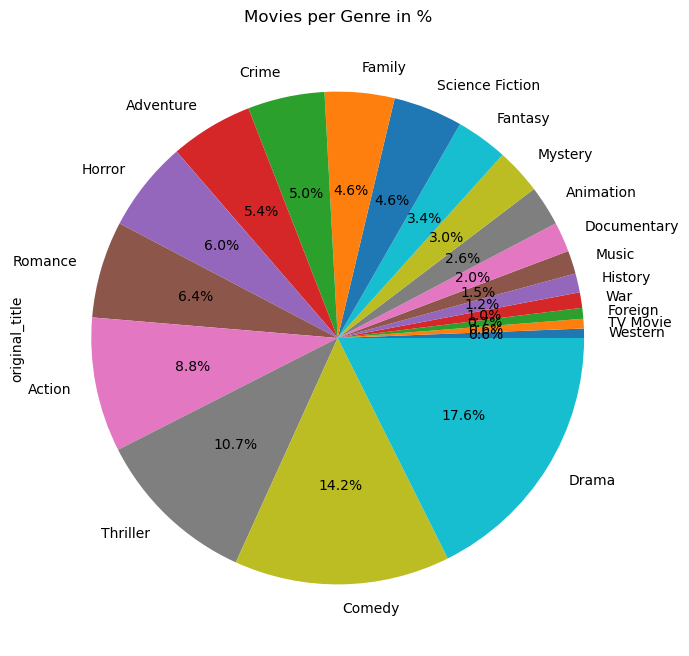

In [59]:
genres_count['original_title'].plot.pie(title = 'Movies per Genre in %', autopct = '%1.1f%%', figsize = (8,8))
plt.show()

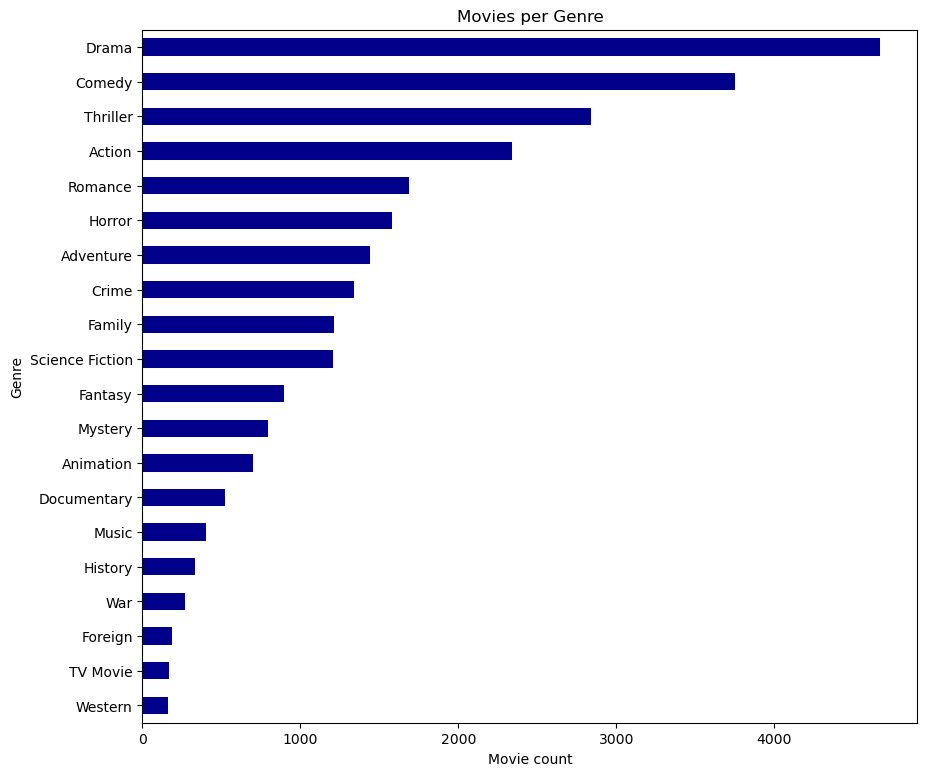

In [32]:
genres_count['original_title'].plot.barh(title = 'Movies per Genre', color = 'DarkBlue', figsize = (10,9))
plt.xlabel('Movie count')
plt.ylabel('Genre')
plt.show()


2. Which genres have high avg. budget and revenue?

In [35]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only = True)
pd.options.display.float_format = '{:2f}'.format

genres_avg

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,2000.056208,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,1999.388851,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,2003.995708,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,2000.816240,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,1999.491137,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,2000.774167,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,2000.292576,420.741266,5.863537,63701071.733624


In [36]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

In [37]:
genres_avg 

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
Western,0.590615,18974107.975758,28568709.284848,117.575758,1986.915152,205.739394,6.083030,9594601.309091
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
History,0.575936,18594919.302395,32011793.215569,136.206587,1997.497006,183.772455,6.410479,13416873.913174
Romance,0.592082,12531271.847547,35691972.327103,106.891355,2000.438668,166.070678,6.042874,23160700.479556


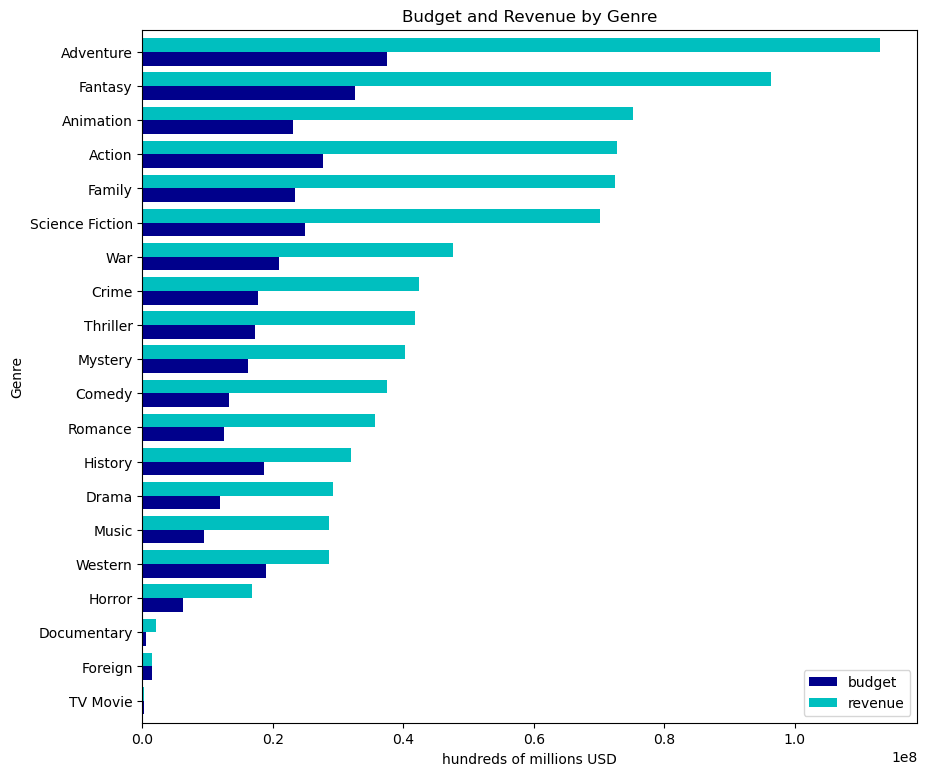

In [38]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', width = 0.8, color = ('DarkBlue','c'), figsize = (10,9))
plt.xlabel('hundreds of millions USD')
plt.ylabel('Genre')
plt.show()

3. Which genres have high avg. profit?

In [40]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

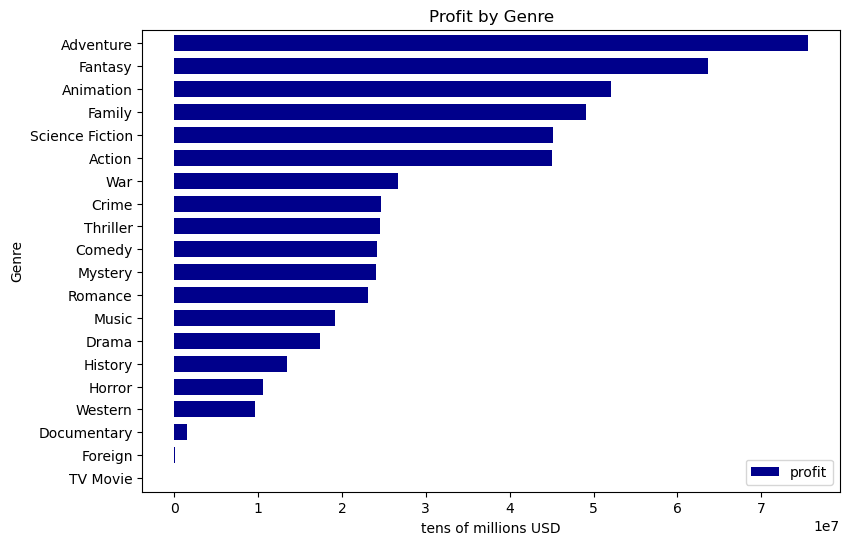

In [41]:
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', width = 0.7, color = ('DarkBlue'), figsize = (9,6))
plt.xlabel('tens of millions USD')
plt.ylabel('Genre')
plt.show()

4. Which genres have high avg. popularity?

In [42]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)
genres_avg.head()

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,2001.398936,16.627660,5.981383,69024.909574
TV Movie,0.270896,267664.670659,251497.005988,91.982036,2004.634731,34.365269,5.788024,-16167.664671
Horror,0.465357,6226529.210751,16822808.624313,94.424557,2001.117288,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,2000.196078,124.340686,6.480392,19133141.142157


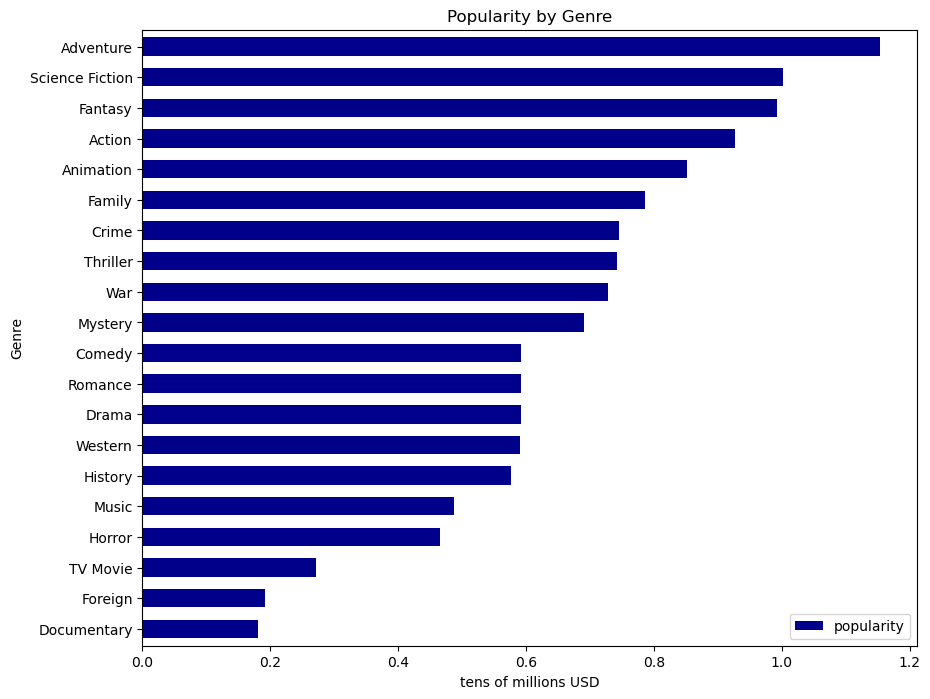

In [43]:
genres_avg[['popularity']].plot.barh(title = 'Popularity by Genre', width = 0.6, color = ('DarkBlue'), figsize = (10,8))
plt.xlabel('tens of millions USD')
plt.ylabel('Genre')
plt.show()

5. Which genres have highest number of movies with an voting avg. >=8?

In [44]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action


In [45]:
# filtering by vote_count more than 50 for the purpose of data reliability
# we will compare that data with vote_count less that 50

vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[(movies_genre['vote_average'] >= 8)]

In [48]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


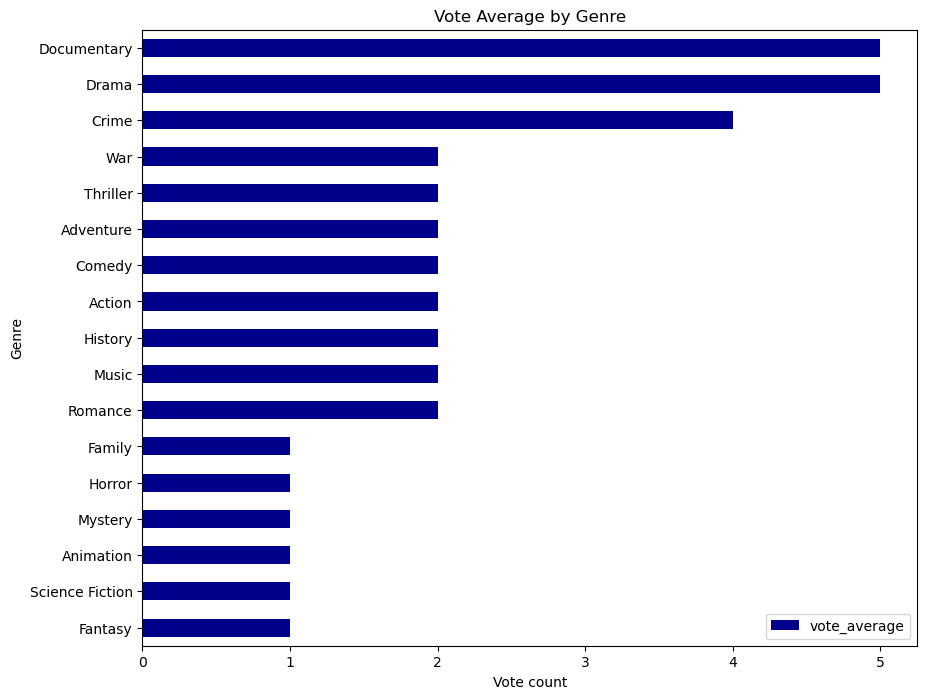

In [49]:
genres_vote[['vote_average']].plot.barh(title = 'Vote Average by Genre', width = 0.5, color = ('DarkBlue'), figsize = (10,8))
plt.xlabel('Vote count')
plt.ylabel('Genre')
plt.show()

In [52]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)
genres_vote

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


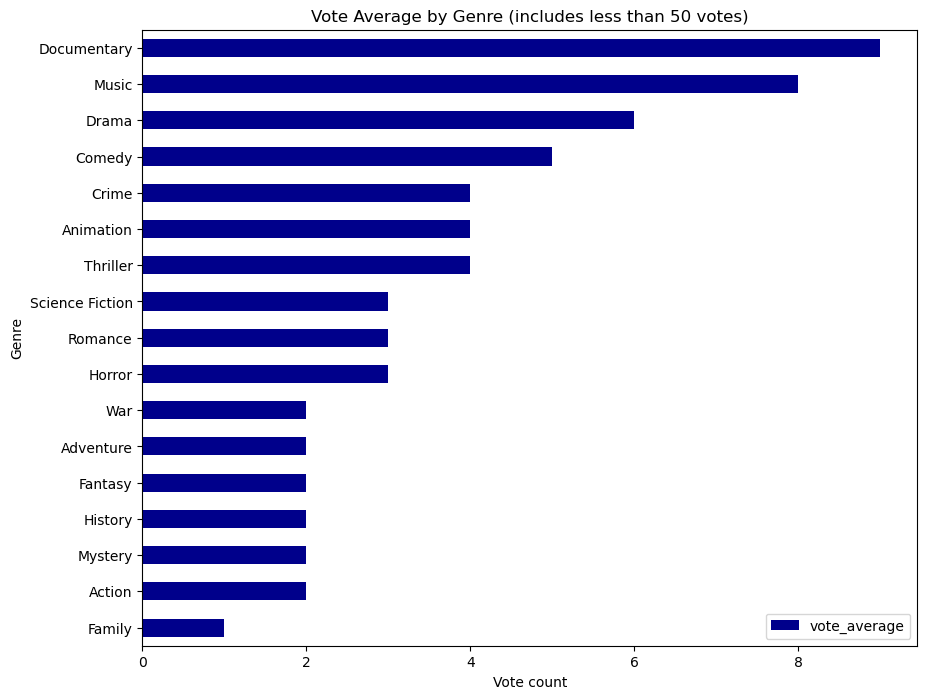

In [53]:
genres_vote[['vote_average']].plot.barh(title = 'Vote Average by Genre (includes less than 50 votes)', width = 0.5, color = ('DarkBlue'), figsize = (10,8))
plt.xlabel('Vote count')
plt.ylabel('Genre')
plt.show()

## Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.


In [174]:
# Re-frarming dataset to it's original structure

In [54]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [55]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [56]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

In [57]:
movies_counted_corr = movies_counted.corr(method = 'spearman',numeric_only = True)
movies_counted_corr

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


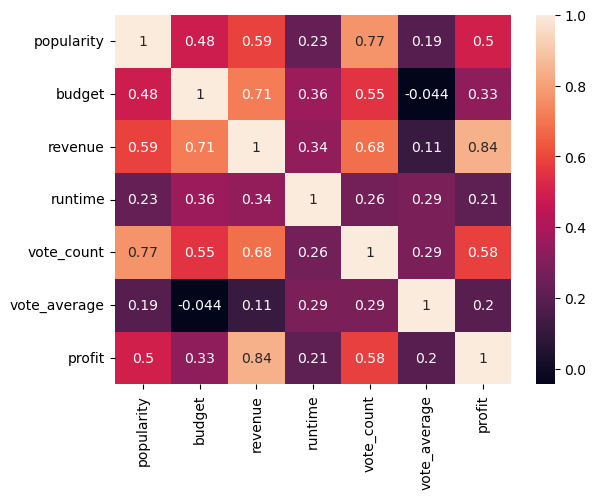

In [60]:
import seaborn as sns
sns.heatmap(movies_counted_corr, annot = True)
plt.show()

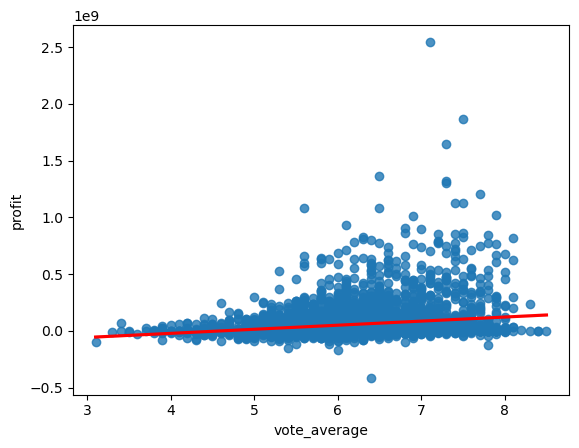

In [62]:
sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {"color":'red'})
plt.show()


2. The best movies according to popularity return high profit and revenue.


In [63]:
movies_counted_corr = movies_counted.corr(method = 'spearman',numeric_only = True)
movies_counted_corr

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


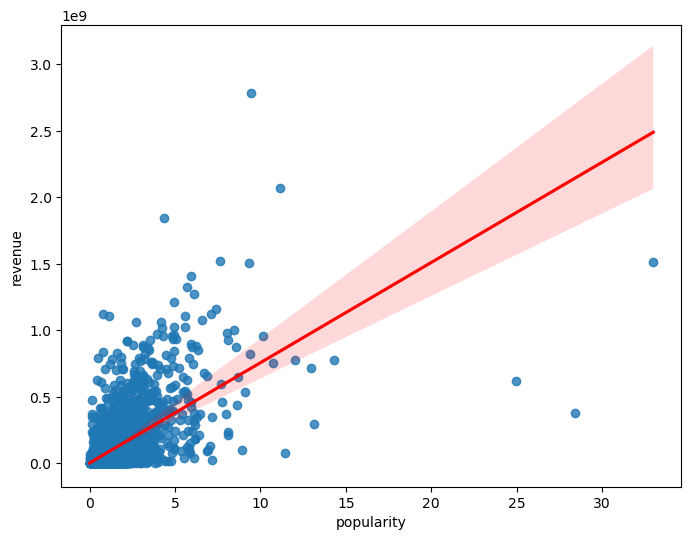

In [64]:
plt.figure(figsize =(8,6))
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {"color":'red'})
plt.show()


3. Highly budgeted movies return high profit.


In [65]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


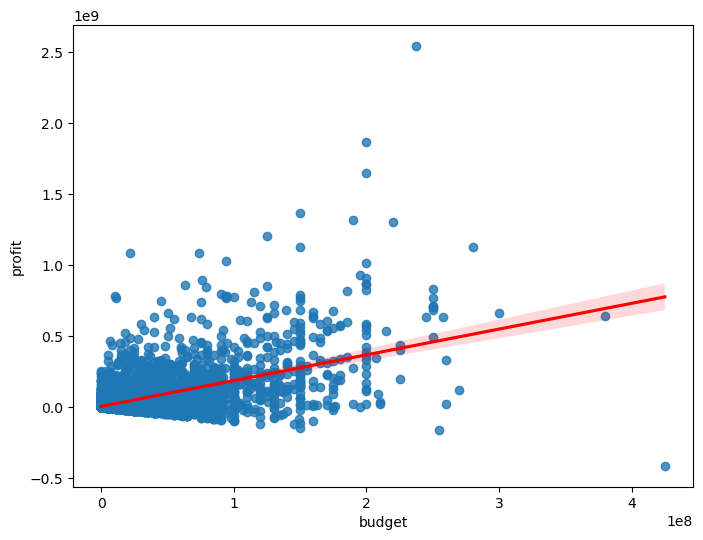

In [66]:
plt.figure(figsize =(8,6))
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color":'red'})
plt.show()

4. Highly budgeted movies have a high popularity

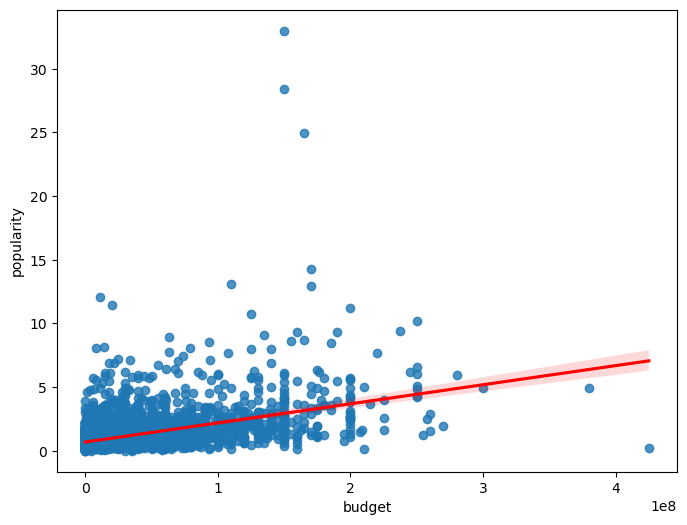

In [67]:
plt.figure(figsize =(8,6))
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color":'red'})
plt.show()

5. How profit varies by Genres from 1960 to 2015

In [72]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360


In [75]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())
time_genre

profit
release_year genres_split                   
1960         Action           6363125.000000
             Adventure         431000.000000
             Comedy           5258750.000000
             Crime                  0.000000
             Drama            8245619.384615
...                                      ...
2015         Science Fiction 83321303.523256
             TV Movie         -150000.000000
             Thriller        32869106.847953
             War             54677314.333333
             Western         72856619.000000

[1049 rows x 1 columns]

In [76]:
# Creating Pivot table

pivot_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

In [77]:
pivot_genre

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,
Action,6363125.000000,2457142.857143,10437500.000000,14999691.250000,24280000.000000,16104504.777778,324785.714286,21732786.428571,8868478.833333,5861449.300000,...,38048623.212500,45977444.052632,47642764.404040,57555510.740741,34571030.355140,51968078.252174,71910257.424242,47431725.628099,69943650.015504,90399046.747664
Adventure,431000.000000,39130002.333333,21214285.714286,9428395.000000,24123400.000000,25124276.333333,791563.636364,49281873.857143,15122159.400000,16651809.400000,...,64895200.090909,83916731.083333,55016526.809524,113364919.736111,98125646.677966,113343224.564516,162549574.300000,100638113.402985,120373306.985075,144787868.971014
Animation,NaN,211880014.000000,NaN,0.000000,0.000000,0.000000,-105000.000000,100921706.000000,0.000000,0.000000,...,39047734.974359,67147670.531250,51907242.575758,48862898.250000,58455658.640000,63420098.934783,69231546.875000,93718795.261905,64313463.250000,83691174.384615
Comedy,5258750.000000,22198001.400000,1599974.800000,765591.923077,7080111.375000,3264285.714286,-149550.000000,10135087.470588,-1277777.777778,-125000.000000,...,24944308.174194,30674848.549669,21483012.426036,24741982.808081,23154807.875740,27241358.720930,25631999.136364,25068455.091429,26648786.864865,33703819.067901
Crime,0.000000,18828411.000000,3709948.666667,369526.750000,1723307.300000,-22500.000000,-275560.000000,12899678.714286,6762174.600000,31482963.000000,...,21551432.962264,16700048.400000,31258696.854839,11016642.307692,13490412.320000,25395271.625000,29522925.555556,23248589.507042,5903014.230769,61286524.372549
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,6772940.000000,5229344.631579,321262.230769,-1603933.560000,187417.771429,2567196.816327,1102306.591837,321880.225806,13104.136986,531061.859649
Drama,8245619.384615,4912698.375000,4373796.190476,1587307.692308,3726105.550000,11933809.800000,1014793.062500,18045095.000000,6354859.150000,10317995.538462,...,12994800.142132,13953425.421320,16736384.017167,15209056.888393,13510589.176190,10830976.523364,23418944.870690,13344942.608696,13697098.665493,16315310.438462
Family,3333333.333333,42576002.800000,4000000.000000,-333333.333333,37818181.750000,51671428.666667,-341828.571429,64281204.000000,-640000.000000,0.000000,...,35281751.276923,80470561.733333,44483026.142857,62009322.100000,98999767.490909,65483435.472222,69321493.023810,89321956.437500,56295182.744186,85974520.750000
Fantasy,-375000.000000,0.000000,-126.000000,-500000.000000,24068181.750000,NaN,0.000000,-3000000.000000,-2000000.000000,0.000000,...,57967661.441176,93461583.425532,51441997.767442,96235822.102041,83235328.522727,94486677.847826,122245621.970588,79363628.000000,112966482.638889,86576948.303030


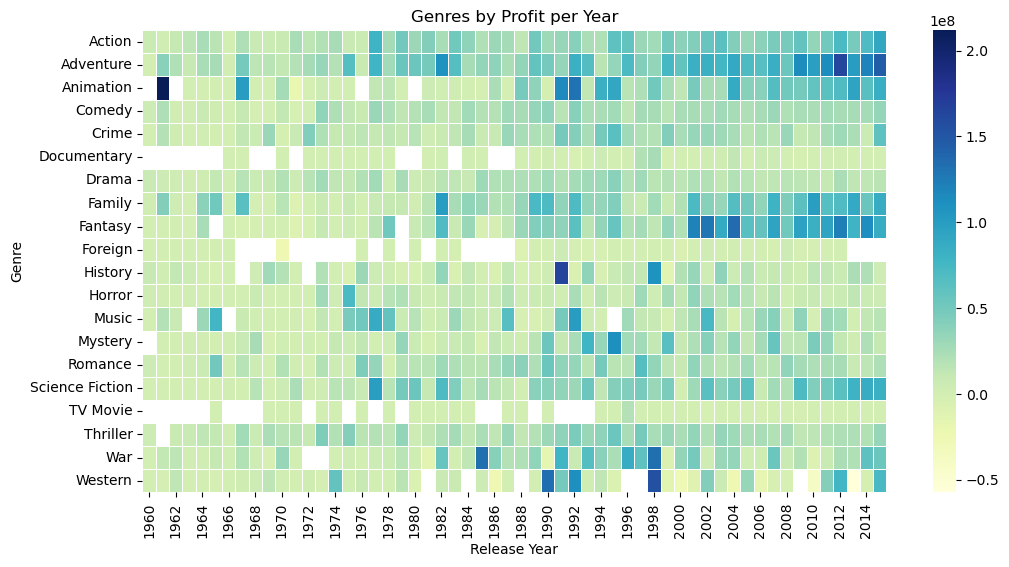

In [79]:
plt.figure(figsize =(12,6))

sns.heatmap(pivot_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')
plt.xlabel('Release Year')
plt.ylabel('Genre')

plt.show()